# Modelo de Regressão Linear Múltipla (MRLM)

## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Dados de entrada

In [2]:
x0 = [1, 1, 1, 1, 1]
x1 = np.array([31, 16, 29, 19, 27])
x2 = np.array([4, 5, 3, 0, 2])
y = np.array([12, 13, 3, 3, 11])

X = np.column_stack((x0, x1, x2))

## Calculando β

β = (X_T . X)⁻1 . X_T . y

In [3]:
print(f'(x_t . x) = {X.T @ X}\n========================')
print(f'(x_t . x)⁻1 = {np.linalg.inv(X.T @ X)}\n========================')
print(f'(x_t . x)-1 . x_t = {np.linalg.inv(X.T @ X) @ X.T}\n========================')
print(f'beta = (x_t . x)-1 . x_t . y = {np.linalg.inv(X.T @ X) @ X.T @ y}\n========================')

beta = np.linalg.inv(X.T @ X) @ X.T @ y

(x_t . x) = [[   5  122   14]
 [ 122 3148  345]
 [  14  345   54]]
(x_t . x)⁻1 = [[ 4.04147173e+00 -1.39402109e-01 -1.57164380e-01]
 [-1.39402109e-01  5.86789311e-03 -1.34802950e-03]
 [-1.57164380e-01 -1.34802950e-03  6.78772500e-02]]
(x_t . x)-1 . x_t = [[-0.90865118  1.02521608 -0.47268258  1.39283165 -0.03671398]
 [ 0.03711046 -0.05225597  0.0267227  -0.02791214  0.01633495]
 [ 0.07255571  0.1606534   0.00737451 -0.18277694 -0.05780668]]
beta = (x_t . x)-1 . x_t . y = [ 4.78058838 -0.05788597  1.79708191]


## Plotando os dados e o hiperplano que melhor aproxima os pontos

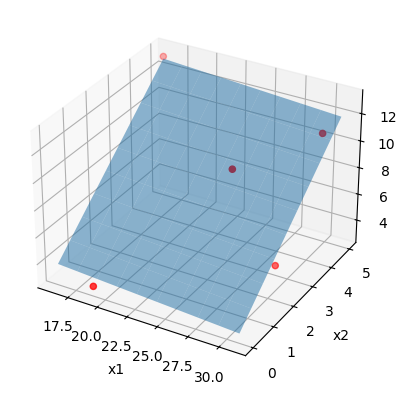

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, c='r', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Criar os pontos do plano
x1_plano = np.linspace(min(x1), max(x1), 10)
x2_plano = np.linspace(min(x2), max(x2), 10)
X1_plano, X2_plano = np.meshgrid(x1_plano, x2_plano)

# Calcular os valores de y correspondentes usando os coeficientes beta
Y_plano = beta[0] + beta[1] * X1_plano + beta[2] * X2_plano

# Plotar o plano
ax.plot_surface(X1_plano, X2_plano, Y_plano, alpha=0.5)

plt.show()